# Task4



1.   Анализируйте только пользователей, а не администраторов.
2.   Используйте фильтр status = 'ready' для коммитов.
3.   Размеры шрифта и figsize такие же, как и раньше.
4.   Для каждого часа подсчитайте среднее количество коммитов в рабочие дни и в выходные (если в течение часа в одну из дат не было коммитов, не используйте его для расчета среднего значения). Используйте эти значения для расчета средних в категории "рабочие дни" и в категории "выходные" и дальнешего построения графика, например: понедельник, 17–18: 5 коммитов; вторник, 17–18: 6 коммитов; среда, 17–18: 7 коммитов.
5. Выберите цветовую палитру по своему вкусу, не обязательно использовать те же самые цвета, что на графике выше.
6. В конце Jupyter Notebook создайте markdown-ячейку и вставьте вопрос:
«Отличается ли динамика в рабочие и выходные дни?». В качестве ответа добавьте значения часа, когда количество коммитов является наибольшим в рабочие дни, и часа, когда количество коммитов является наибольшим в выходные дни.

In [1]:
import sqlite3   #импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from datetime import date
import calendar

In [2]:
from google.colab import drive   #подключаем диск
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
data = sqlite3.connect('/content/drive/MyDrive/School21/day12/data/checking-logs.sqlite') #соединились с базой данных с помощью библиотеки sqlite3

In [4]:
sql1 = '''
SELECT * FROM checker
WHERE (uid LIKE "user_%") AND (status='ready')
'''
pd.read_sql(sql1, data, parse_dates='timestamp')


,index,status,success,timestamp,numTrials,labname,uid
0,7,ready,0,2020-04-17 05:19:02.744528,1,project1,user_4
1,9,ready,1,2020-04-17 05:22:45.549397,2,project1,user_4
2,11,ready,1,2020-04-17 05:34:24.422370,3,project1,user_4
3,13,ready,0,2020-04-17 05:43:27.773992,4,project1,user_4
4,15,ready,1,2020-04-17 05:46:32.275104,5,project1,user_4
...,...,...,...,...,...,...,...
1681,3393,ready,1,2020-05-21 20:01:48.959966,9,laba06s,user_19
1682,3395,ready,0,2020-05-21 20:18:54.487900,6,laba06s,user_1
1683,3397,ready,0,2020-05-21 20:19:06.872761,7,laba06s,user_1
1684,3399,ready,0,2020-05-21 20:22:41.877806,8,laba06s,user_1


In [5]:
sql1 = '''
SELECT timestamp FROM checker
WHERE (uid LIKE "user_%") AND (status='ready')
'''
hourly_commits = pd.read_sql(sql1, data, parse_dates='timestamp')
hourly_commits['day'] = hourly_commits.timestamp.dt.weekday
hourly_commits['hour'] = hourly_commits.timestamp.dt.hour
hourly_commits['date'] = hourly_commits.timestamp.dt.date
hourly_commits['is_weekend'] = hourly_commits.day.apply(lambda x: 'weekend' if x > 4 else 'weekday')
hourly_commits

,timestamp,day,hour,date,is_weekend
0,2020-04-17 05:19:02.744528,4,5,2020-04-17,weekday
1,2020-04-17 05:22:45.549397,4,5,2020-04-17,weekday
2,2020-04-17 05:34:24.422370,4,5,2020-04-17,weekday
3,2020-04-17 05:43:27.773992,4,5,2020-04-17,weekday
4,2020-04-17 05:46:32.275104,4,5,2020-04-17,weekday
...,...,...,...,...,...
1681,2020-05-21 20:01:48.959966,3,20,2020-05-21,weekday
1682,2020-05-21 20:18:54.487900,3,20,2020-05-21,weekday
1683,2020-05-21 20:19:06.872761,3,20,2020-05-21,weekday
1684,2020-05-21 20:22:41.877806,3,20,2020-05-21,weekday


сгруппировали комиты

In [6]:
hourly_commits = hourly_commits.groupby(by=['hour', 'date', 'is_weekend'], as_index=False)\
    .agg({'timestamp': 'count'})\
    .rename(columns={'timestamp': 'commits'})
hourly_commits

,hour,date,is_weekend,commits
0,0,2020-04-19,weekend,1
1,0,2020-04-23,weekday,2
2,0,2020-04-26,weekend,1
3,0,2020-05-10,weekend,1
4,0,2020-05-14,weekday,2
...,...,...,...,...
282,23,2020-05-03,weekend,1
283,23,2020-05-09,weekend,6
284,23,2020-05-11,weekday,2
285,23,2020-05-13,weekday,4


посчитали средний коммит в каждом часовом интервале в будний день и в выходной

In [7]:
hourly_commits = hourly_commits.groupby(['is_weekend', 'hour'], as_index=False)\
    .agg({'commits': 'mean'})
hourly_commits

,is_weekend,hour,commits
0,weekday,0,2.000000
1,weekday,3,1.000000
2,weekday,5,4.000000
3,weekday,6,1.000000
4,weekday,7,2.666667
5,weekday,8,2.333333
6,weekday,9,3.400000
7,weekday,10,6.800000
8,weekday,11,3.692308
9,weekday,12,3.727273


разделила выходные и будни для построения двух диаграмм

In [8]:
hourly_commits = hourly_commits.pivot(index='hour', 
                                      columns='is_weekend', 
                                      values='commits')
hourly_commits

is_weekend,weekday,weekend
hour,,
0,2.000000,1.000000
1,NaN,3.000000
3,1.000000,1.000000
5,4.000000,1.000000
6,1.000000,NaN
7,2.666667,2.500000
8,2.333333,4.000000
9,3.400000,2.166667
10,6.800000,3.750000


In [9]:
hourly_commits = hourly_commits.fillna(0)
hourly_commits

is_weekend,weekday,weekend
hour,,
0,2.000000,1.000000
1,0.000000,3.000000
3,1.000000,1.000000
5,4.000000,1.000000
6,1.000000,0.000000
7,2.666667,2.500000
8,2.333333,4.000000
9,3.400000,2.166667
10,6.800000,3.750000


In [10]:
hourly_commits_new = hourly_commits.copy()
hourly_commits_new.loc[2] = [0, 0]
hourly_commits_new.loc[4] = [0, 0]
hourly_commits_new = hourly_commits_new.sort_index(ascending=True)
hourly_commits_new

is_weekend,weekday,weekend
hour,,
0,2.000000,1.000000
1,0.000000,3.000000
2,0.000000,0.000000
3,1.000000,1.000000
4,0.000000,0.000000
5,4.000000,1.000000
6,1.000000,0.000000
7,2.666667,2.500000
8,2.333333,4.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1bd63f450>,
      dtype=object)

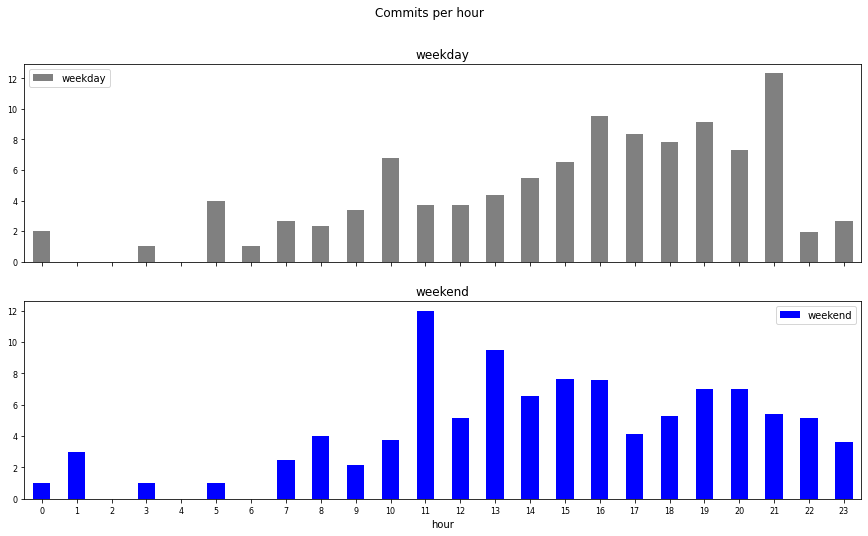

In [11]:
hourly_commits_new.plot(
    kind = 'bar', 
    figsize = (15, 8),
    rot = 0,
    legend = True,
    xlabel = "hour",
    fontsize = 8,
    color = ['grey', 'blue'],
    subplots=True,
    title='Commits per hour')


In [13]:
data.close()

Отличается ли динамика в рабочие и выходные дни?

In [12]:
"Ответ: в рабочие дни - {}, в выходные - {}".format(hourly_commits.weekday.idxmax(),
                                                    hourly_commits.weekend.idxmax())

'Ответ: в рабочие дни - 21, в выходные - 11'